# MAKE PNAME MODEL

In [1]:
import numpy as np

#mpname mpstand pname pmake
with open('pname_over200.csv') as file:
    csv_data = []
    for line in file.readlines():
        csv_data.append(line.split(','))

In [2]:
mpname = []
mpstand = []
pname = []

mpname = np.array(csv_data)[:, 0]
mpstand = np.array(csv_data)[:, 1]
pname = np.array(csv_data)[:, 2]

In [3]:
mpbase = ["" for row in range(len(csv_data))]

for i in range(len(csv_data)):
    mpbase[i] = mpname[i] + mpstand[i]

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
mpbase_tokenizer = Tokenizer()
pname_tokenizer = Tokenizer()

In [5]:
mpbase_tokenizer.fit_on_texts(mpbase)
pname_tokenizer.fit_on_texts(pname)

In [6]:
mpbase_sequences = mpbase_tokenizer.texts_to_sequences(mpbase)
pname_sequences = pname_tokenizer.texts_to_sequences(pname)

In [7]:
train_length = int(len(csv_data) * 0.8)
train_length

127285

In [8]:
train_data = np.array(mpbase_sequences)[:train_length]
train_labels = np.array(pname_sequences)[:train_length]

In [9]:
test_data = np.array(mpbase_sequences)[train_length:]
test_labels = np.array(pname_sequences)[train_length:]

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=414):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(414, activation='softmax'))

Using TensorFlow backend.


In [14]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [15]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [16]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 126285 samples, validate on 1000 samples
Epoch 1/4
126285/126285 [==============================] - 44s 350us/step - loss: 1.2112 - acc: 0.7436 - val_loss: 0.4607 - val_acc: 0.8230
Epoch 2/4
126285/126285 [==============================] - 43s 340us/step - loss: 0.3230 - acc: 0.8783 - val_loss: 0.3720 - val_acc: 0.8430
Epoch 3/4
126285/126285 [==============================] - 46s 367us/step - loss: 0.2781 - acc: 0.8941 - val_loss: 0.3564 - val_acc: 0.8570
Epoch 4/4
126285/126285 [==============================] - 43s 344us/step - loss: 0.2536 - acc: 0.9036 - val_loss: 0.3604 - val_acc: 0.8750


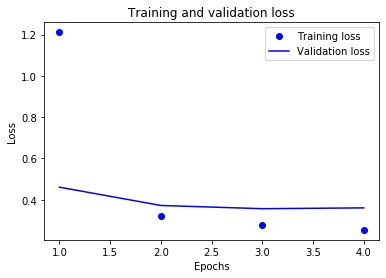

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

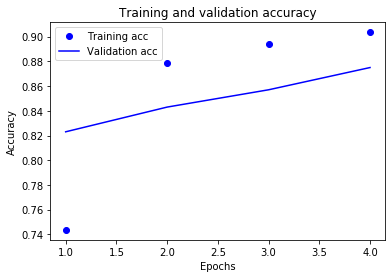

In [18]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
predictions = model.predict(x_test)

In [20]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

31822/31822 [==============================] - 6s 191us/step
[0.3098828221737016, 0.888724781601383]


In [21]:
from keras.models import load_model
model.save('ML_PNAME.h5')

In [22]:
reverse_word_map = dict(map(reversed, pname_tokenizer.word_index.items()))
def already_predict_word(i, n=1):
    p = predictions[i]
    idx = np.flip(np.argsort(p), 0)
    for j in idx[:n]:
        print('"', reverse_word_map[j], " (p={:4.2f}%)".format(100 * p[j]))

In [23]:
already_predict_word(35, 3)

" 건포도  (p=99.74%)
" 아몬드슬라이스  (p=0.16%)
" 볶음통깨  (p=0.05%)
